# Project Foundations for Data Science: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

- order_id: Unique ID of the order
- customer_id: ID of the customer who ordered the food
- restaurant_name: Name of the restaurant
- cuisine_type: Cuisine ordered by the customer
- cost: Cost of the order
- day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
- rating: Rating given by the customer out of 5
- food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
- delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


### Let us start by importing the required libraries


In [43]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data


In [44]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]


In [45]:
# To obtain number of rows and columns 
df.shape

(1898, 9)

#### Observations:

Number of rows = 1898

Number of columns = 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]


In [46]:
# Used info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The dataset contains a total of 1,898 entries, ranging from 0 to 1,897, which corresponds to the total number of rows present.

A total of 9 columns are found within the dataset, as detailed under the section labeled 'Data columns (total 9 columns)'.

The column named 'order_id' comprises 1,898 observations that are not null, each classified under the data type 'int64', as highlighted by 'order_id 1898 non-null int64'.

In terms of data types within the dataset, there are four columns classified as 'int64', four columns identified as 'object', and one column categorized under 'float64'.

The memory requirement for storing this dataframe is slightly over 133.6 KB.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]


In [47]:
# To check the missing data isnull() is used and to sum the number of 'True' values in that column, sum() is used.
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

The output provided indicates the count of missing values present in each column.

From the information available, it is evident that there are no missing values in any of the columns.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]


In [48]:
# describe() function is used to check the statisticle summary of the data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

The table presented offers a statistical overview of all the columns within the dataframe.

The statistics pertaining to the time required for food preparation are as follows:

The minimum time observed is 20 minutes.

The average (mean) time is approximately 27.37 minutes.

The maximum time recorded is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]


In [49]:
# value_counts() function is used to give count of unique values in the column
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:

Total number of orders not rated is equal to 736 (Not given)


### Exploratory Data Analysis (EDA)


### Univariate Analysis


### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]


### Box Plot


In [50]:
# check the head() of the foodhub dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


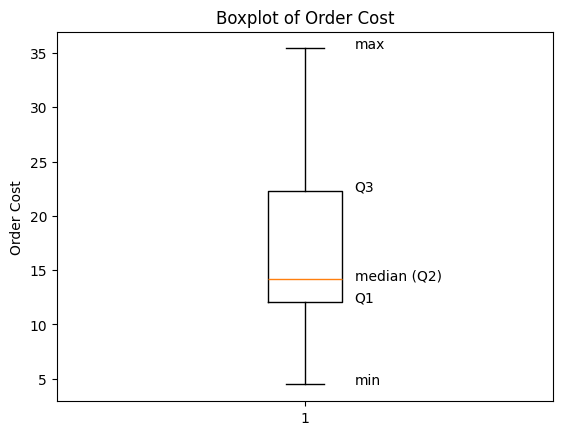

In [51]:
# plot a distribution of Order Cost
plt.boxplot(df['cost_of_the_order'])

# add labels for five number summary
plt.text(x = 1.1, y = df['cost_of_the_order'].min(), s ='min')
plt.text(x = 1.1, y = df.cost_of_the_order.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = df['cost_of_the_order'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = df.cost_of_the_order.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = df['cost_of_the_order'].max(), s ='max')


# add the graph title and axes labels
plt.title('Boxplot of Order Cost')
plt.ylabel('Order Cost')

# display the plot
plt.show()

### Observations:

The above plot indicates that the median of order cost is close to Q1 rather than Q3 which means the oder cost is positively skewed


### Count Plot


In [52]:
# check the head() of the foodhub dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [53]:
df.cuisine_type.value_counts()

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

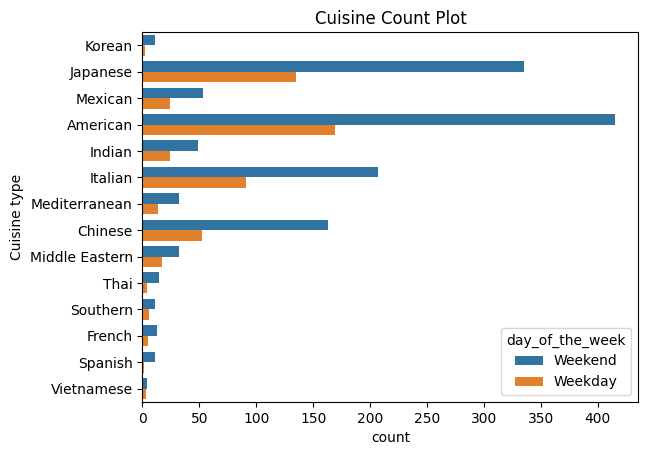

In [54]:
# count of observations for each cuisine_type based on day_of_the_week
#'day_of_the_week' as hue parameter
sns.countplot(data = df, y = 'cuisine_type', hue = 'day_of_the_week')

plt.title('Cuisine Count Plot')
plt.ylabel('Cuisine type')
# display the plot
plt.show()

The above plot clearly shows that American cuisine is more popular on weekends followed by Japanese and Italian


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]


In [55]:
# sort restaurants and display top 5 based on number of orders received 
df.restaurant_name.value_counts()[0:5]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

The five leading restaurants, based on the volume of orders received, are listed below:

Shake Shack, with a total of 219 orders.

The Meatball Shop, accumulating 132 orders.

Blue Ribbon Sushi, with 119 orders.

Blue Ribbon Fried Chicken, receiving 96 orders.

Parm, with a total of 68 orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]


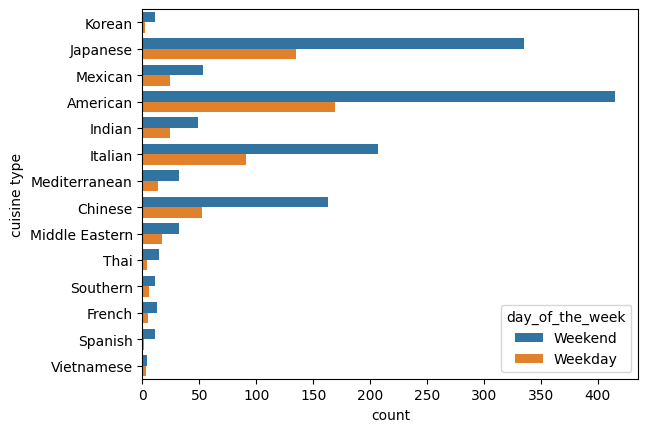

In [56]:
# count of observations for each cuisine_type based on day_of_the_week
#'day_of_the_week' as hue parameter
sns.countplot(data = df, y = 'cuisine_type', hue = 'day_of_the_week')

plt.ylabel('cuisine type')
# display the plot
plt.show()

#### Observations:

From the above count plot, the most popular cuisine on weekends is American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]


In [57]:
# Conditional count function to find number of orders greater than $20
count=(df['cost_of_the_order']>20).sum()

#total numbers of orders
total=df.shape[0]

percentage_orders_greater_than_20=(count/total)*100
round(percentage_orders_greater_than_20,2)

29.24

#### Observations:

29.24% of the orders cost more than $20


### **Question 10**: What is the mean order delivery time? [1 mark]


In [58]:
# describe() function is used to check the statisticle summary of the data
df.describe()['delivery_time']

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observations:

The mean order delivery time is 24.16


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]


In [59]:
# Sort and display top 3 customers based on number of orders placed
df.customer_id.value_counts()[0:3]

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:

The three customers with the highest frequency of orders are identified by their IDs as follows:

Customer ID 52832, who has placed a total of 13 orders.

Customer ID 47440, with a total of 10 orders.

Customer ID 83287, having placed 9 orders in total.


### Multivariate Analysis


### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [60]:
# Filtering ratings column and removing not given ratings
df_valid_ratings=df[~df['rating'].str.contains("Not given")]

# New filtered data frame which has all ratings given as integer
df_valid_ratings['rating']=df_valid_ratings['rating'].astype('int')

In [61]:
# Adding total time column which is sum of food preparation time and delivery time
df_valid_ratings['total_time'] = df_valid_ratings['food_preparation_time'] + df_valid_ratings['delivery_time']
df_valid_ratings

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,44
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63
...,...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30,63
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22,42
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,50


### Bar Plot (Bivariate)


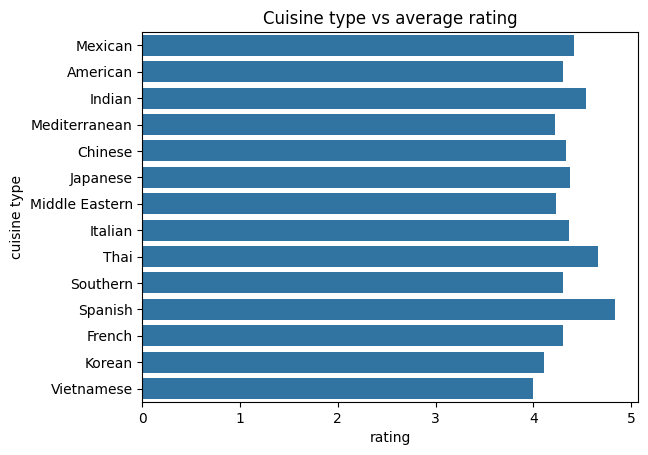

In [62]:
# bar plot of average rating vs cuisine type
sns.barplot(
    x=df_valid_ratings['rating'], 
    y=df_valid_ratings['cuisine_type'], 
    data=df_valid_ratings,
    ci=None)

plt.title('Cuisine type vs average rating')
plt.ylabel('cuisine type')
plt.show()

### Observations:

The above Bivariate bar plot shows that Spanish cuisine has highest average ratings followed by Thai and Indian (Please note that ratings not given aren't considered in this data set).


### Bar Plot (Multivariate)


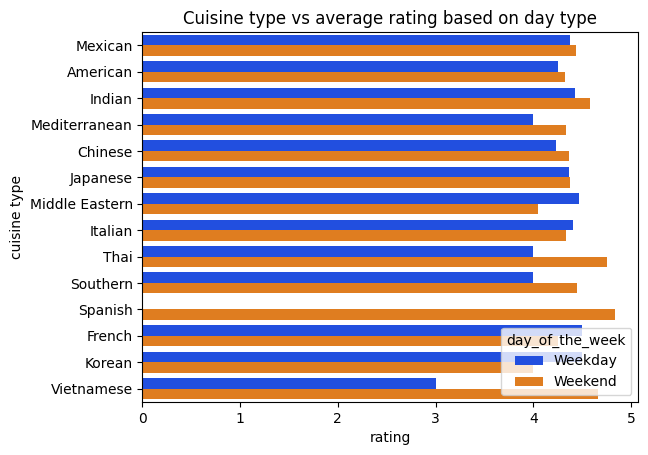

In [63]:
# bar plot of average rating vs cuisine type with hue as day of the week
sns.barplot(
    x=df_valid_ratings['rating'], 
    y=df_valid_ratings['cuisine_type'], 
    data=df_valid_ratings, 
    palette='bright',
    hue=df_valid_ratings['day_of_the_week'],
    ci=None)

plt.title('Cuisine type vs average rating based on day type')
plt.ylabel('cuisine type')
plt.show()

### Observations:

Although there are no ratings given for Spanish cuisine on weekdays. Vietnamese cuisine has a average rating of 3 on weekday and average rating of 4.8 on weekends.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]


In [64]:
# To dispplay restaurants that have rating count greater than 50
value_counts = df_valid_ratings.restaurant_name.value_counts()
value_counts[value_counts > 50]

restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
Name: count, dtype: int64

In [65]:
# Filtering the data for above restaurants
options = ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken'] 
    
# selecting rows based on condition 
Count_greater_than_50_mean_df = df_valid_ratings[df_valid_ratings['restaurant_name'].isin(options)] 
    
Count_greater_than_50_mean_df

# Calculating average to check it they are greater than 4 for the above four restaurants
average_rating = Count_greater_than_50_mean_df.groupby('restaurant_name').agg({'rating':['mean']})
average_rating

,rating
,mean
restaurant_name,
Blue Ribbon Fried Chicken,4.328125
Blue Ribbon Sushi,4.219178
Shake Shack,4.278195
The Meatball Shop,4.511905


#### Observations:

The above analysis states that the four restaurants below have rating count more than 50 and the average rating is greater than 4:

Blue Ribbon Fried Chicken

Blue Ribbon Sushi

Shake Shack

The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]


In [66]:
# Calculate and add revenue column based on order cost conditions
def calculate_revenue(cost):
    if cost>20:
        return (cost*0.25) 
    elif cost>5:
        return (cost*0.15) 
    else:
        return 0

df['revenue']=df['cost_of_the_order'].apply(calculate_revenue)

revenue=df['revenue'].sum()
round(revenue,2)


6166.3

#### Observations:

Net revenue generated by the company across all orders is $6166.3


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]


In [67]:
# Adding a column Total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49
...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,6.3050,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270,54


In [68]:
# Conditional count function to find number of orders that took longer than 60 minutes
count=(df['total_time']>60).sum()

#total numbers of orders
total=df.shape[0]

percentage_total_time_greater_than_60=(count/total)*100
round(percentage_total_time_greater_than_60,2)

10.54

#### Observations:

10.54% of the orders took longer than 60 minutes


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]


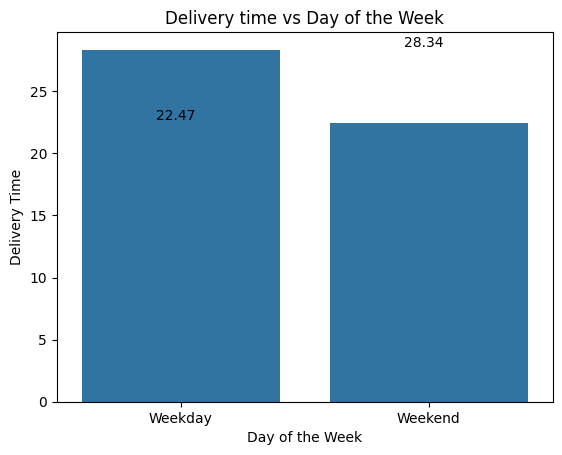

In [69]:
# Assuming df is your DataFrame and is cleaned as per previous discussions
sns.barplot(
    x='day_of_the_week', 
    y='delivery_time', 
    data=df,
    ci=None,
    order=['Weekday', 'Weekend']  # Explicitly define the order of categories
)

# Calculate means
delivery_time_means = df.groupby('day_of_the_week')['delivery_time'].mean()
delivery_time_mean_weekend = round(delivery_time_means['Weekend'], 2)
delivery_time_mean_weekday = round(delivery_time_means['Weekday'], 2)

# Adding text to the plot for mean values
plt.text(x = -0.1, y = delivery_time_mean_weekend + 0.2, s = str(delivery_time_mean_weekend))
plt.text(x = 0.9, y = delivery_time_mean_weekday + 0.2, s = str(delivery_time_mean_weekday))

plt.title('Delivery time vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()


### Observations:

The mean delivery time of the orders on weekends is 22.47 and weekdays is 28.34


#### Observations:


### Conclusion and Recommendations


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]


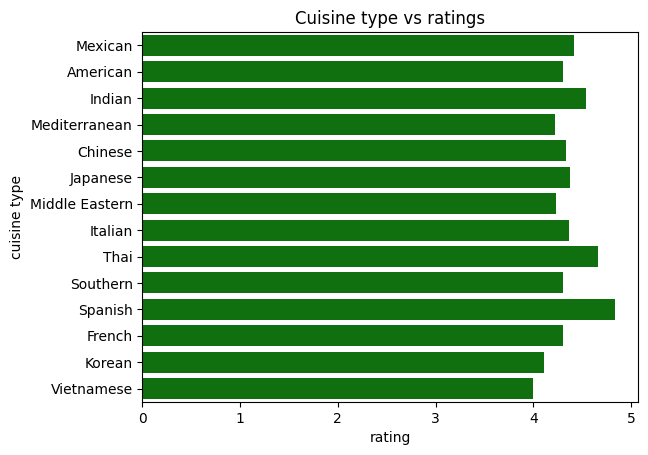

In [70]:
# To check average ratings vs cuisine type
sns.barplot(
    x=df_valid_ratings['rating'], 
    y=df_valid_ratings['cuisine_type'], 
    data=df_valid_ratings,
    color='green',
    ci=None)

plt.title("Cuisine type vs ratings")
plt.ylabel('cuisine type')
plt.show()

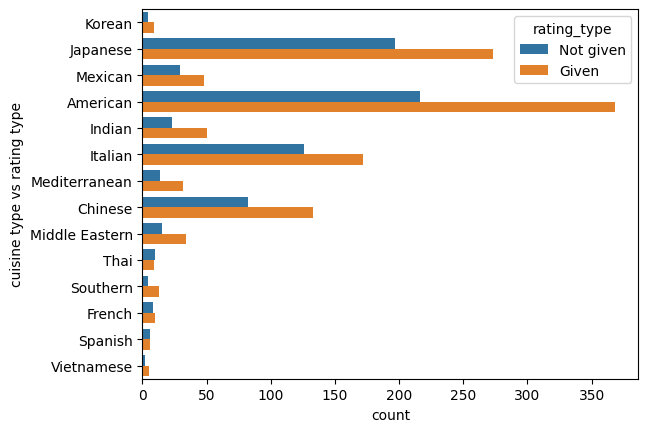

In [71]:
# To check how many customers gave ratings and how many did not give ratings vs cuisine type
df['rating_type']=df['rating'].apply(lambda rating: 'Not given' if rating == "Not given" else 'Given')

sns.countplot(data = df, y = 'cuisine_type', hue = 'rating_type')

plt.ylabel('cuisine type vs rating type')
# display the plot
plt.show()

### Conclusions:

- Spanish cuisine has more average ratings followed by Thai and Indian
- There are more than 50% customers across each cuisine type who haven't given any ratings


### Recommendations:

- Cuisine types which has higher average ratings can be featured on the
- Encourage customers to provide feedback ratings and incentivize them to do so.


---
